In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.2f' % x)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
information = {"Deneyim Yılı(x)": [5,7,3,3,2,7,3,10,6,4,8,1,1,9,1],
               "Maaş(y)": [600,900,550,500,400,950,540,1200,900,550,1100,460,400,1000,380]}

df = pd.DataFrame(data=information)
df

,Deneyim Yılı(x),Maaş(y)
0,5,600
1,7,900
2,3,550
3,3,500
4,2,400
5,7,950
6,3,540
7,10,1200
8,6,900
9,4,550


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Deneyim Yılı(x),15.00,4.67,3.02,1.00,2.50,4.00,7.00,10.00
Maaş(y),15.00,695.33,280.66,380.00,480.00,550.00,925.00,1200.00


In [4]:
# Verilen bias ve weight’e göre doğrusal regresyon model denklemini oluşturunuz.
# Bias = 275, Weight= 90 (y’ = b+wx)

df["Maaş Tahmini(y')"] = 270 + 90 * df["Deneyim Yılı(x)"]
df.head()

,Deneyim Yılı(x),Maaş(y),Maaş Tahmini(y')
0,5,600,720
1,7,900,900
2,3,550,540
3,3,500,540
4,2,400,450


In [5]:
df["Hata(y-y')"] = df["Maaş(y)"] - df["Maaş Tahmini(y')"] 
df.head()

,Deneyim Yılı(x),Maaş(y),Maaş Tahmini(y'),Hata(y-y')
0,5,600,720,-120
1,7,900,900,0
2,3,550,540,10
3,3,500,540,-40
4,2,400,450,-50


In [6]:
df["Hata Kareleri"] = df["Hata(y-y')"]**2
df.head()

,Deneyim Yılı(x),Maaş(y),Maaş Tahmini(y'),Hata(y-y'),Hata Kareleri
0,5,600,720,-120,14400
1,7,900,900,0,0
2,3,550,540,10,100
3,3,500,540,-40,1600
4,2,400,450,-50,2500


In [7]:
df["Mutlak Hata(|y-y'|)"] = abs(df["Hata(y-y')"])
df.head()

,Deneyim Yılı(x),Maaş(y),Maaş Tahmini(y'),Hata(y-y'),Hata Kareleri,Mutlak Hata(|y-y'|)
0,5,600,720,-120,14400,120
1,7,900,900,0,0,0
2,3,550,540,10,100,10
3,3,500,540,-40,1600,40
4,2,400,450,-50,2500,50


* **Tablo Kullanılarak MSE, RMSE ve MAE Hesaplama**

In [8]:
# MSE

mse = df["Hata Kareleri"].sum() / len(df["Hata Kareleri"])
mse

4466.666666666667

In [9]:
#RMSE 

rmse = np.sqrt(mse)
rmse

66.8331255192114

In [10]:
# MAE

mae = df["Mutlak Hata(|y-y'|)"].sum() / len(df["Mutlak Hata(|y-y'|)"])
mae

54.666666666666664

* **Hazır Formüllerle MSE, RMSE ve MAE Hesaplama**

In [11]:
X = df[["Deneyim Yılı(x)"]]
y = df[["Maaş(y)"]]
reg_model = LinearRegression().fit(X, y)
y_pred = reg_model.predict(X)

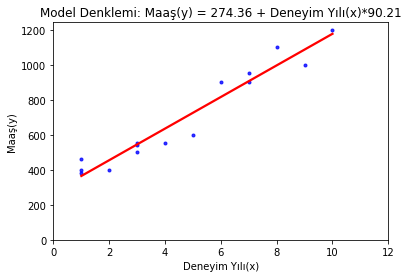

In [12]:
g = sns.regplot(x=X, y=y, scatter_kws={'color': 'b', 's': 9},
                ci=False, color="r")  


g.set_title(f"Model Denklemi: Maaş(y) = {round(reg_model.intercept_[0], 2)} + Deneyim Yılı(x)*{round(reg_model.coef_[0][0], 2)}")
g.set_ylabel("Maaş(y)")
g.set_xlabel("Deneyim Yılı(x)")
plt.xlim(0, 12)
plt.ylim(bottom=0)
plt.show()

In [13]:
# MSE
mean_squared_error(y, y_pred)

4437.849912739964

In [14]:
print(y.mean())
print(y.std())

Maaş(y)   695.33
dtype: float64
Maaş(y)   280.66
dtype: float64


In [15]:
# RMSE
np.sqrt(mean_squared_error(y, y_pred))

66.61718931882343

In [16]:
# MAE
mean_absolute_error(y, y_pred)

54.32041884816754

In [17]:
# R-KARE
reg_model.score(X, y)

0.9396360551357491

* **R kare bağımsız değişkenlerin, bağımlı değişkeni açıklama yüzdesidir. Yani bu model için bağımsız değişken, bağımlı değişkenin %93'nü açıklamaktadır.**